# Data cleaning

## Representatives
- office room and phone columns deleted -> we don't need them
- NaNs in comittee list replaced with empty string
- Example of extracting comittees by splitting the string

In [1]:
import pandas as pd

def split_comittees(comittees: str):
    if comittees == "":
        return []
    return comittees.split("|")

# Chosen representatives
df = pd.read_csv('data/chosen_representatives.csv')
df = df.drop(["office_room", "phone"], axis=1)
df["committee"] = df["committee"].fillna("")
df.to_csv('data/cleaned_chosen_representatives.csv') 

In [2]:
# All representatives
df = pd.read_csv('data/representatives.csv')
df = df.drop(["office_room", "phone"], axis=1)
df["committee"] = df["committee"].fillna("")
df.to_csv('data/cleaned_representatives.csv') 

### All representatives

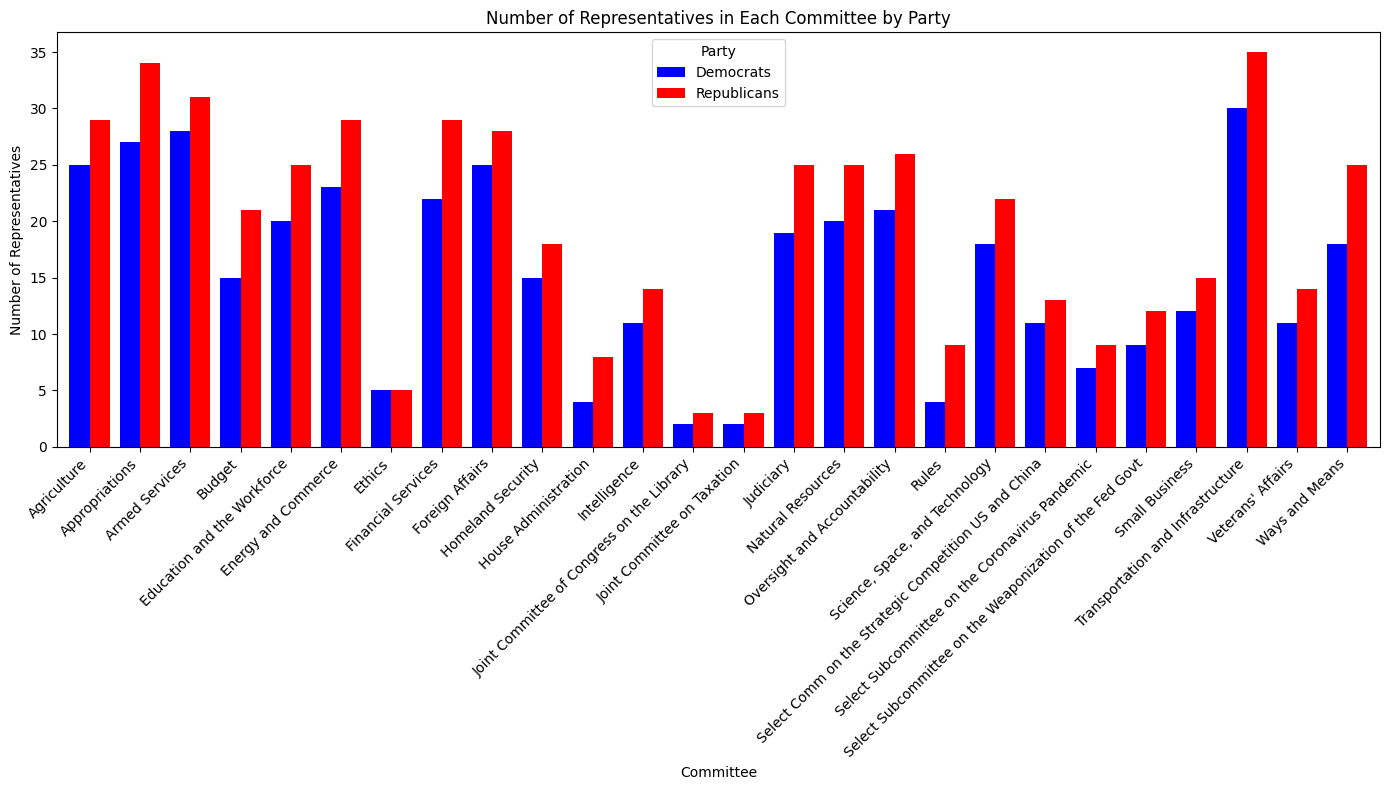

In [3]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

df["committee"] = df["committee"].transform(split_comittees)

col_list_D = df.loc[df['party'] == 'D']['committee'].values.tolist()
col_list_R = df.loc[df['party'] == 'R']['committee'].values.tolist()
merged_list_D = list(itertools.chain.from_iterable(col_list_D))
merged_list_R = list(itertools.chain.from_iterable(col_list_R))

committee_counts_D = pd.Series(merged_list_D).value_counts()
committee_counts_R = pd.Series(merged_list_R).value_counts()

# Combine counts into a single DataFrame
committee_counts = pd.DataFrame({
    'Democrats': committee_counts_D,
    'Republicans': committee_counts_R
}).fillna(0)  # Fill NaN values with 0

# Plot the bar chart
bar_colors = ['blue', 'red']
committee_counts.plot(kind='bar', figsize=(14, 8), width=0.8, color=bar_colors)
plt.xlabel('Committee')
plt.ylabel('Number of Representatives')
plt.title('Number of Representatives in Each Committee by Party')
plt.legend(title='Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('charts/comitees_per_party.png')

plt.show()


## Articles
- date changed to standard format '%Y-%m-%d'
- reduced number of issues, grouped as defined in `topics` dict

### Date standarization

In [4]:
from datetime import datetime

def parse_date(date_str):
    for fmt in ('%B %d, %Y', '%Y-%m-%d', '%m/%d/%Y'):  # Add any other formats you expect
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

df_art = pd.read_csv('data/articles.csv', index_col="idx")
df_art['date'] = df_art['date'].apply(parse_date)
df_art = df_art.dropna(subset=['date'])
df_art['date'] = df_art['date'].dt.strftime('%Y-%m-%d')


In [5]:
df_art["representative_name"].value_counts()

representative_name
Bishop, Sanford              3573
Miller-Meeks, Mariannette    1488
LaMalfa, Doug                1026
Larson, John                  941
Radewagen, Aumua Amata        921
Norcross, Donald              909
Boebert, Lauren               873
Davids, Sharice               828
Scalise, Steve                773
Craig, Angie                  738
Harris, Andy                  620
Ruppersberger, C.             556
Pocan, Mark                   537
Bost, Mike                    489
Mrvan, Frank                  447
Sewell, Terri                 440
Mace, Nancy                   379
Mann, Tracey                  373
Flood, Mike                   346
Pappas, Chris                 302
Soto, Darren                  297
Wagner, Ann                   261
Zinke, Ryan                   229
Comer, James                  154
Carl, Jerry                    85
Gaetz, Matt                    84
Amodei, Mark                   77
Scholten, Hillary              45
Name: count, dtype: int64

In [6]:
df_art["text"].count()

np.int64(17774)

### Topic standarization

In [7]:
topics = {
    "Defense" : "National Security, Defence, Foreign Affairs and Veterans issues",
    "Border Security": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Armed Services": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Connecticut’s Defense Industry": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Homeland Security": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Military, Veterans, & National Security": "National Security, Defence, Foreign Affairs and Veterans issues",
    "National Security and Veterans": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Military & Veterans": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Veterans and Defense": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Veterans Issues": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Veterans and Defense": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Defense and National Security": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Veterans": "National Security, Defence, Foreign Affairs and Veterans issues",
    "National Security": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Military Servicemembers and Veterans": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Veterans & Armed Forces": "National Security, Defence, Foreign Affairs and Veterans issues",
    "2nd Amendment Rights": "National Security, Defence, Foreign Affairs and Veterans issues",
				"Second Amendment": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Defense and Security": "National Security, Defence, Foreign Affairs and Veterans issues",
    "2nd Amendment": "National Security, Defence, Foreign Affairs and Veterans issues",
    "What Rep. Flood is doing for the military and veterans": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Defense And Veterans": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Defence and Veterans issues": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Foreign Affairs": "National Security, Defence, Foreign Affairs and Veterans issues",
				"Immigration": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Foreign Policy": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Defense and Foreign Affairs": "National Security, Defence, Foreign Affairs and Veterans issues",
    "Defense & Security": "National Security, Defence, Foreign Affairs and Veterans issues",
    
    "Economy & Jobs (Small Business)": "Jobs and the Economy",
    "Economy and Jobs": "Jobs and the Economy",
    "Economy, Financial Services, & Trade": "Jobs and the Economy",
    "Business & Employers": "Jobs and the Economy",
    "Jobs & Workforce": "Jobs and the Economy",
    "Jobs and Workforce Development": "Jobs and the Economy",
    "Jobs and the Workforce": "Jobs and the Economy",
    "Economy": "Jobs and the Economy",
    "Inflation and the Economy": "Jobs and the Economy",
    "Building an Economy that Works for Everyone": "Jobs and the Economy",
    "Jobs & Economic Growth": "Jobs and the Economy",
    "Jobs, Economy & Small Businesses": "Jobs and the Economy",
    "Small Business": "Jobs and the Economy",
    "Small Business and Economy": "Jobs and the Economy",
    "Jobs and Economy": "Jobs and the Economy",
    "What Rep. Flood is doing to grow America’s economy": "Jobs and the Economy",
    "Jobs And The Economy": "Jobs and the Economy",
    "Jobs & Economy": "Jobs and the Economy",

    "Energy": "Agriculture, Energy and Environment",
    "Energy & Environment": "Agriculture, Energy and Environment",
    "Energy And Environment": "Agriculture, Energy and Environment",
    "Energy and Natural Resources": "Agriculture, Energy and Environment",
    "Environment": "Agriculture, Energy and Environment",
    "Natural Resources": "Agriculture, Energy and Environment",
    "Energy, Conservation, & Interior Department": "Agriculture, Energy and Environment",
    "Public Lands & Environment": "Agriculture, Energy and Environment",
    "Water": "Agriculture, Energy and Environment",
    "Forestry": "Agriculture, Energy and Environment",
    "Disaster Relief & Preparedness": "Agriculture, Energy and Environment",
    "Maritime": "Agriculture, Energy and Environment",
    "Hurricane Recovery and Coastal Restoration": "Agriculture, Energy and Environment",
    "Fisheries": "Agriculture, Energy and Environment",
    "What Rep. Flood is doing to grow American agriculture and energy": "Agriculture, Energy and Environment",
    "Agriculture & Rural Development": "Agriculture, Energy and Environment",
    "Agriculture": "Agriculture, Energy and Environment",
    "Energy and Environment": "Agriculture, Energy and Environment",
    "Offshore Drilling": "Agriculture, Energy and Environment",

    "Tax Reform": "Federal Budget and Taxes",
				"Taxes and Spending": "Federal Budget and Taxes",
    "Federal Budget, Appropriations, & Taxes": "Federal Budget and Taxes",
    "Budget": "Federal Budget and Taxes",
    "Federal Spending and Borrowing": "Federal Budget and Taxes",
    "Fiscal Discipline": "Federal Budget and Taxes",
    "Fiscal Responsibility": "Federal Budget and Taxes",
    "Federal Budget, Jobs, & the Economy": "Federal Budget and Taxes",
    "Spending Cuts & Debt": "Federal Budget and Taxes",
    'Taxes': "Federal Budget and Taxes",
    "Budget and Spending": "Federal Budget and Taxes",
    "National Debt": "Federal Budget and Taxes",
    "Budget and Taxes": "Federal Budget and Taxes",
                
				"Health": "Health Care and Social Security", 
    "Healthcare": "Health Care and Social Security",
    "Healthcare, Social Security, & Support Programs": "Health Care and Social Security",
    "Social Security and Medicare": "Health Care and Social Security",
    "Improving Access to Affordable Healthcare": "Health Care and Social Security",
    "Social Security": "Health Care and Social Security",
    "Health Care": "Health Care and Social Security",
    "Making Health Care More Affordable": "Health Care and Social Security",
    "What Rep. Flood is doing to expand healthcare options": "Health Care and Social Security",
    "Disease of Addiction": "Health Care and Social Security",
    "Fighting the Opioid Crisis": "Health Care and Social Security",
    "Combating the Opioid Epidemic": "Health Care and Social Security",
    
				"Senior Citizens": "Supporting Seniors",
    "Seniors": "Supporting Seniors",
                
				"Puerto Rico": "Local issues",
    "Connecticut Manufacturing": "Local issues",
    "Coltsville": "Local issues",
    
    "Making Government Work for Kansans": "Local issues", 
    "Standing up for Local Communities": "Local issues", 
    "Building Our Communities": "Local issues", 
    "Community Groups & News": "Local issues", 
    "Reforming Washington": "Local issues", 
    "Lowering Costs and Strengthening Our Local Economy": "Local issues", 
    
				"Transportation": "Infrastructure and Transportation",
    "Infrastructure": "Infrastructure and Transportation",
    "Transportation & Infrastructure": "Infrastructure and Transportation",
    "Transportation and Infrastructure": "Infrastructure and Transportation",

				"Congressional Issues": "Government and Law",
				"Congress": "Government and Law",
				"Law Enforcement": "Government and Law",
				"Judiciary": "Government and Law",
    "Oversight and Accountability": "Government and Law",
    "Delivering Results": "Government and Law",
    "Oversight and Reform": "Government and Law",
    "Supporting Law Enforcement": "Government and Law",
    "What Rep. Flood is doing in Congress": "Government and Law",
                
				"Women": "Equality and Civil Rights",
				"Equality": "Equality and Civil Rights",
				"Law, Individual Rights, & Equality": "Equality and Civil Rights",
    "Rights & Freedoms": "Equality and Civil Rights",
				"Voting & Civil Rights": "Equality and Civil Rights",
    "Protecting the Right to Vote": "Equality and Civil Rights",
    "Election Integrity": "Equality and Civil Rights",
    "Voting Rights": "Equality and Civil Rights",
    "LGBTQ and Equality": "Equality and Civil Rights",
    "Reproductive Freedoms": "Equality and Civil Rights",
    "Civil Rights": "Equality and Civil Rights",
                
				"Education and Opportunity": "Education",
    "Expanding Educational Opportunities": "Education",
    "What Rep. Flood is doing to expand educational opportunities for families and kids": "Education",
    
				"Communication and Technology": "Science, Technology, & Telecommunications",
    "Finance & Technology": "Science, Technology, & Telecommunications",
    "Communications & Technology": "Science, Technology, & Telecommunications",
                
				"Family Values": "Pro-Life/Abortion and Family Values",
				"Pro-Life and Family Values": "Pro-Life/Abortion and Family Values",
                
				"Housing and Community Development": "Housing",
                
				"Back the Blue": "undef",
				"Crumbling Foundations": "undef",
    "Program Awards & Announcements": "undef",
    "Getting Things Done": "undef",
    "Public Service & Crime Prevention": "undef",
    "Financial Services": "undef",
    "Vice Chairman of Congressional Steel Caucus": "undef",
    "Supporting Organized Labor": "undef",
    "Ranking Member of House Veterans’ Affairs Subcommittee on Oversight and Investigations": "undef",
    "Congressional Steel Caucus": "undef",
    "Helping Families": "undef",

    "Life": "undef",
    "Education and Labor": "undef",
    "Native American Communities": "undef",
    "Congressman Larson's Committees": "undef",
    "Bills I've Sponsored/Co-Sponsored": "undef",
    "Public Lands": "undef",
   
    "Crime and Justice": "undef",
    "America's Workers": "undef",
    "Parris Island": "undef",
    "Spending": "undef"
}

In [8]:
def isEducation(title: str):
    """Checks if the title is education-related using more specific keywords."""
    keywords = ["school", "college", "university", "academy", "institute", "education", "learning", "child"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

df_art.loc[(df_art["issue"] == "Education and Labor") & (df_art["title"].apply(isEducation)), "issue"] = "Education"

In [9]:
def isSocialSecurity(title: str):
    keywords = ["social security"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

def isSeniors(title: str):
    keywords = ["senior"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

def isTaxes(title: str):
    keywords = ["tax"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

def isAbortion(title: str):
    keywords = ["abortion"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isSocialSecurity)), "issue"] = "Social Security"
df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isSeniors)), "issue"] = "Supporting Seniors"
df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isTaxes)), "issue"] = "Taxes"
df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isAbortion)), "issue"] = "Pro-Life/Abortion and Family Values"

In [10]:
import numpy as np

def standardize_topic(topic: str):
    return topics.get(topic, topic)
np.unique(df_art["issue"].transform(standardize_topic).to_list())

array(['Agriculture, Energy and Environment', 'Constitutional Issues',
       'Education', 'Equality and Civil Rights',
       'Federal Budget and Taxes', 'Government and Law',
       'Health Care and Social Security', 'Housing',
       'Infrastructure and Transportation', 'Jobs and the Economy',
       'Local issues',
       'National Security, Defence, Foreign Affairs and Veterans issues',
       'Pro-Life/Abortion and Family Values',
       'Science, Technology, & Telecommunications', 'Supporting Seniors',
       'undef'], dtype='<U63')

In [11]:
df_art["issue"] = df_art["issue"].apply(standardize_topic)
df_art = df_art[df_art["issue"] != "undef"]
df_art = df_art.dropna()
df_art = df_art.reset_index(drop=True)
df_art = df_art.drop_duplicates(subset=['issue', 'title', 'date']) #Remove duplicates created after mapping. Title and Date are considered to make an unique key per article
df_art.to_csv('data/cleaned_articles.csv') 

In [12]:
import re
def clean_up_text(text: str):
    if "[[" in text:
        return pd.NA
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = text.replace("\xa0", " ")
    text = text.replace("###", "")
    text = text.replace("# # #", "")
    text = text.replace("       Image     ", " ")
    text = re.sub(r"<{2,}", "", text)
    text = re.sub(r">{2,}", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [13]:
df_art["text"] = df_art["text"].apply(clean_up_text)
df_art = df_art.dropna()

### Text length filtering

In [14]:
df_art["char_count"] = df_art["text"].apply(lambda x: len(x))
df_art_filtered = df_art[(df_art["char_count"] > 150) & (df_art["char_count"] < 10000)]
df_art_filtered["char_count"].describe()

count    14364.000000
mean      2570.219925
std       1624.021598
min        151.000000
25%       1422.000000
50%       2141.000000
75%       3250.250000
max       9977.000000
Name: char_count, dtype: float64

In [15]:
df_art_filtered["representative_name"].value_counts()

representative_name
Bishop, Sanford              2550
Miller-Meeks, Mariannette    1450
LaMalfa, Doug                 931
Radewagen, Aumua Amata        912
Davids, Sharice               811
Larson, John                  782
Craig, Angie                  712
Norcross, Donald              628
Boebert, Lauren               601
Harris, Andy                  549
Pocan, Mark                   522
Ruppersberger, C.             446
Bost, Mike                    435
Sewell, Terri                 366
Flood, Mike                   343
Mrvan, Frank                  318
Pappas, Chris                 300
Mann, Tracey                  295
Soto, Darren                  289
Mace, Nancy                   280
Wagner, Ann                   223
Zinke, Ryan                   216
Comer, James                  147
Carl, Jerry                    85
Gaetz, Matt                    74
Amodei, Mark                   54
Scholten, Hillary              45
Name: count, dtype: int64

In [16]:
df_art_filtered["text"].count()

np.int64(14364)

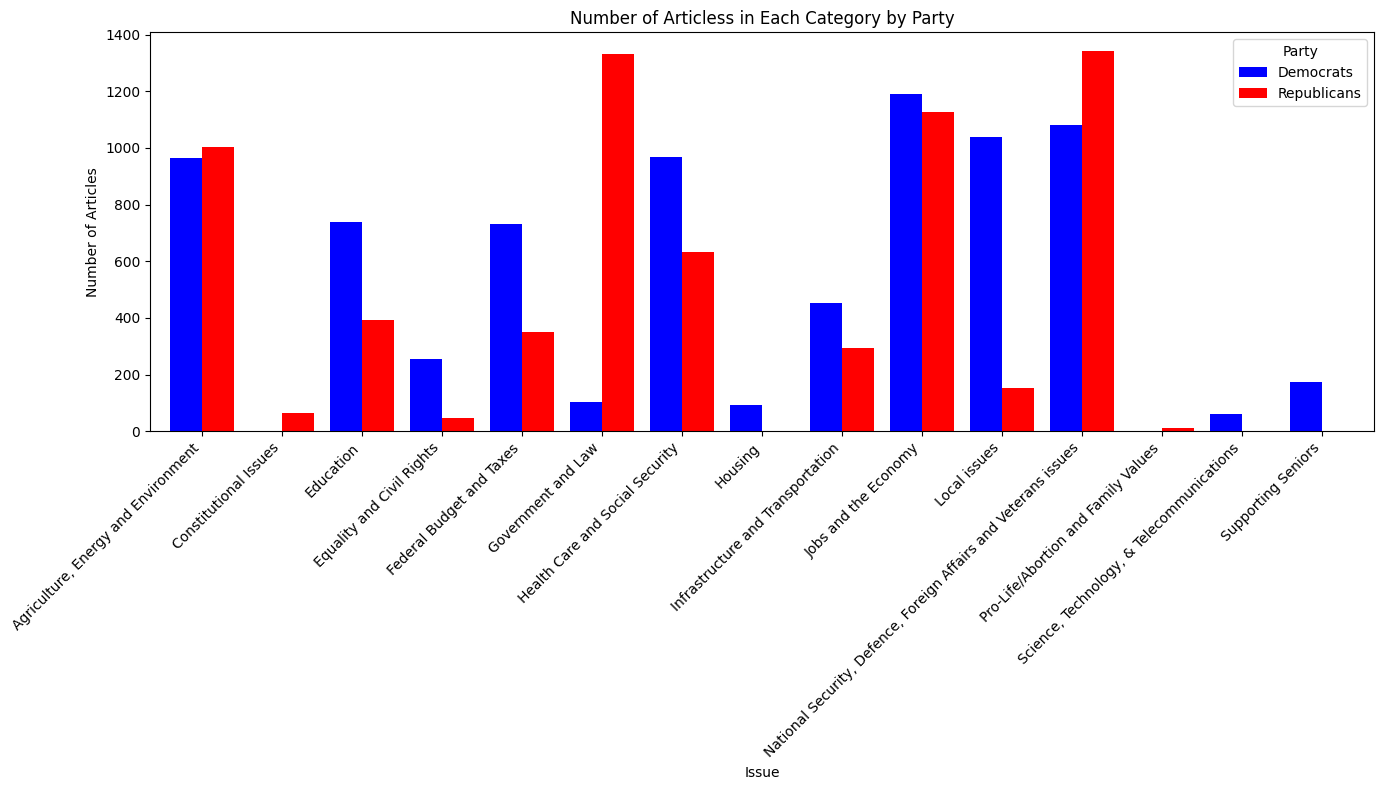

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

col_list_D = df_art.loc[df_art['representative_party'] == 'D']['issue'].values.tolist()
col_list_R = df_art.loc[df_art['representative_party'] == 'R']['issue'].values.tolist()

committee_counts_D = pd.Series(col_list_D).value_counts()
committee_counts_R = pd.Series(col_list_R).value_counts()

# Combine counts into a single DataFrame
committee_counts = pd.DataFrame({
    'Democrats': committee_counts_D,
    'Republicans': committee_counts_R
}).fillna(0)  # Fill NaN values with 0

# Plot the bar chart
bar_colors = ['blue', 'red']
committee_counts.plot(kind='bar', figsize=(14, 8), width=0.8, color=bar_colors)
plt.xlabel('Issue')
plt.ylabel('Number of Articles')
plt.title('Number of Articless in Each Category by Party')
plt.legend(title='Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('charts/articles_per_issue.png')

plt.show()

### Multilabelling

In [18]:
def merge_duplicates(group):
    issues = ';'.join(group['issue'].tolist())
    new_row = group.iloc[0].copy()
    new_row['issue'] = issues
    return new_row

df_merged = df_art_filtered.groupby(['title', 'date', 'representative_name']).apply(merge_duplicates).reset_index(drop=True)
df_merged.drop(["char_count"], axis=1).to_csv('data/cleaned_merged_articles.csv')
print("Number of rows in the DataFrame:", df_merged.shape[0])

/tmp/ipykernel_2161/1996282661.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged = df_art_filtered.groupby(['title', 'date', 'representative_name']).apply(merge_duplicates).reset_index(drop=True)


Number of rows in the DataFrame: 10071


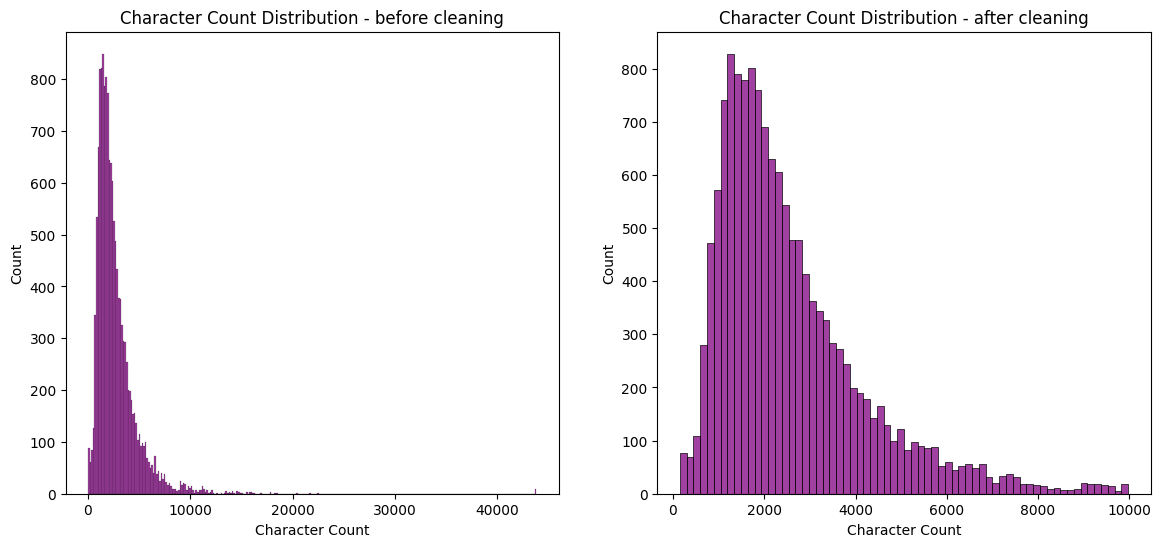

In [19]:
import seaborn as sns

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 6))
sns.histplot(df_art["char_count"], color="purple", ax = ax[0])
ax[0].set_title("Character Count Distribution - before cleaning")
ax[0].set_xlabel("Character Count")
sns.histplot(df_art_filtered["char_count"], color="purple", ax = ax[1])
ax[1].set_title("Character Count Distribution - after cleaning")
ax[1].set_xlabel("Character Count")

plt.savefig('charts/characters_per_article.png')

In [20]:
df_merged["text"].count()

np.int64(10071)

In [21]:
df_merged["representative_name"].value_counts()

representative_name
Bishop, Sanford              1141
Radewagen, Aumua Amata        884
Miller-Meeks, Mariannette     793
LaMalfa, Doug                 710
Larson, John                  634
Davids, Sharice               629
Craig, Angie                  580
Norcross, Donald              513
Pocan, Mark                   419
Harris, Andy                  402
Ruppersberger, C.             386
Sewell, Terri                 325
Bost, Mike                    324
Mrvan, Frank                  302
Boebert, Lauren               291
Soto, Darren                  259
Mace, Nancy                   252
Pappas, Chris                 250
Flood, Mike                   207
Mann, Tracey                  206
Wagner, Ann                   141
Zinke, Ryan                   125
Comer, James                  111
Gaetz, Matt                    54
Amodei, Mark                   51
Carl, Jerry                    44
Scholten, Hillary              38
Name: count, dtype: int64

In [22]:
df_merged.loc[df_merged['representative_party'] == 'D']['text'].count()


np.int64(5476)

In [23]:
df_merged.loc[df_merged['representative_party'] == 'R']['text'].count()

np.int64(4595)